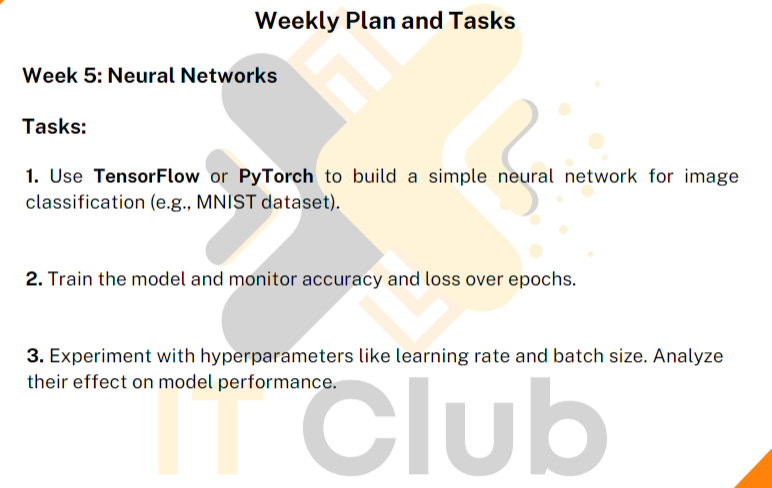

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN().to(device)


100%|██████████| 9.91M/9.91M [00:03<00:00, 3.05MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 59.4kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.3MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 5
train_losses, test_losses = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss/len(trainloader))
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {running_loss/len(trainloader):.4f}")

Epoch 1/5, Training Loss: 0.3896
Epoch 2/5, Training Loss: 0.1900
Epoch 3/5, Training Loss: 0.1367
Epoch 4/5, Training Loss: 0.1102
Epoch 5/5, Training Loss: 0.0934


In [ ]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 96.38%


In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]

results = {}

for lr in learning_rates:
    for bs in batch_sizes:
        print(f"\nTraining with Learning Rate: {lr}, Batch Size: {bs}")

        trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True)
        testloader = torch.utils.data.DataLoader(testset, batch_size=bs, shuffle=False)

        model = SimpleNN().to(device)

        optimizer = optim.Adam(model.parameters(), lr=lr)
        
        epochs = 5
        for epoch in range(epochs):
            model.train()
            running_loss = 0
            for images, labels in trainloader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                output = model(images)
                loss = criterion(output, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            print(f"Epoch {epoch+1}/{epochs}, Training Loss: {running_loss/len(trainloader):.4f}")

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Test Accuracy with LR={lr}, Batch Size={bs}: {accuracy:.2f}%")
        results[(lr, bs)] = accuracy

print("\nFinal Results of Hyperparameter Tuning:")
for (lr, bs), acc in results.items():
    print(f"Learning Rate: {lr}, Batch Size: {bs} --> Accuracy: {acc:.2f}%")



Training with Learning Rate: 0.01, Batch Size: 32
Epoch 1/5, Training Loss: 0.4187
Epoch 2/5, Training Loss: 0.3141
Epoch 3/5, Training Loss: 0.2889
Epoch 4/5, Training Loss: 0.2780
Epoch 5/5, Training Loss: 0.2723
Test Accuracy with LR=0.01, Batch Size=32: 92.74%

Training with Learning Rate: 0.01, Batch Size: 64
Epoch 1/5, Training Loss: 0.3905
Epoch 2/5, Training Loss: 0.2542
Epoch 3/5, Training Loss: 0.2287
Epoch 4/5, Training Loss: 0.2265
Epoch 5/5, Training Loss: 0.2118
Test Accuracy with LR=0.01, Batch Size=64: 92.99%

Training with Learning Rate: 0.01, Batch Size: 128
Epoch 1/5, Training Loss: 0.3768
Epoch 2/5, Training Loss: 0.2087
Epoch 3/5, Training Loss: 0.1775
Epoch 4/5, Training Loss: 0.1688
Epoch 5/5, Training Loss: 0.1518
Test Accuracy with LR=0.01, Batch Size=128: 94.20%

Training with Learning Rate: 0.001, Batch Size: 32
Epoch 1/5, Training Loss: 0.3584
Epoch 2/5, Training Loss: 0.1753
Epoch 3/5, Training Loss: 0.1323
Epoch 4/5, Training Loss: 0.1129
Epoch 5/5, Train